## Logistische Regression (Funktionsweise)

Im [vorherigen Abschnitt](logistic_reg) wurde die logistische Regression anhand eines Beispiels vorgestellt. In diesem Abschnitt wird die Funktionsweise der log. Regression mit Code-Beispielen genauer untersucht.

:::{figure-md} neuron1
<img src="images/neuron_one_input.png" alt="neuron" class="bg-primary mb-1" width="600px">

Modell eines Neurons mit einem Input.
:::

**Logistische Regression mit einem Eingangswert am Beispiel:** 

Die Sigmoidfunktion $S(x)=\frac{1}{(1+e^{ -x })}$ in Python:
```python
def S(x):
    return 1 / (1 + np.exp(-x))
```

Erinnerung: Das [Neuron](neuron_activation) aus dem [vorherigen Abschnitt](logistic_reg),  
führt diese Berechnung aus: $S(ax+b)$.

In Python:
```python
def f(a, b, x):
    return S(a * x + b)
```
Die Kostenfunktion: $J\left(\Theta\right)=-\frac{1}{m}\Sigma_{i=1}\left[y^{\left(i\right)}\log\left(h\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h\left(x^{\left(i\right)}\right)\right)\right]$
([Quelle](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)  )  

in Python: ([Herleitung](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression))  

```python
def J(a, b, x, y):
    return -np.mean(y * np.log(f(a, b, x)) + (1 - y) * np.log(1 - f(a, b, x)))
```

Ableitungen:
```python
def J_ableitung_a(a, b, x, y):
    return np.mean(x * (S(a * x + b) - y))


def J_ableitung_b(a, b, x, y):
    return np.mean(S(a * x + b) - y)
```

**Geogebra Beispiel:** (Quelle: Jannis Seemann, Udemy Kurs (unveröffentlicht)) 
Die Funktion $S(x)$ in Geogebra interaktiv erkunden:

- A: z.B. Patient hat Tumor
- B: z.B. Patient hat keinen Tumor
- Die Parameter a und b können über die Schieberegler angepasst werden.
- Die Fehler ErrorA und ErrorB sollen möglichst gering ausfallen


```{note}
Mit den Schiebereglern die Parameter a und b solange anpassen, bis die Kosten costA und costB minimal werden.  
Das ist, was das KNN intern selbstständig erledigt.
```

In [9]:
from IPython.display import IFrame

IFrame("https://www.geogebra.org/m/hndyx9gh",1000,1000)

## Einfaches Beispiel

Kosten: 4.549934130627048
Kosten: 2.9376697928329976
Kosten: 1.3693797440496909
Kosten: 1.4258480540039917
Kosten: 2.7688815344452973
Kosten: 1.2182243003165445
Kosten: 1.6021216158164207
Kosten: 2.874740448906407
Kosten: 1.31248590788559
Kosten: 1.4604054127745647
Kosten: 2.7969160483879225
Kosten: 1.2430129383255524
Kosten: 1.530145447437553
Kosten: 2.839397865338674
Kosten: 1.280972939804821
Kosten: 1.4595386780798696
Kosten: 2.798190210258761
Kosten: 1.24435881298296
Kosten: 1.4861481969134391
Kosten: 2.8151619694374723
Kosten: 1.2595980193000174
Kosten: 1.4450883020924874
Kosten: 2.7901861323209283
Kosten: 1.237536344542189
Kosten: 1.4526985709969036
Kosten: 2.7955745609383817
Kosten: 1.2424811189401035
Kosten: 1.4251794399991777
Kosten: 2.7782446197140014
Kosten: 1.2272797892470477
Kosten: 1.423920389884545
Kosten: 2.7779222424794257
Kosten: 1.2271748324313723
Kosten: 1.4031179330495587
Kosten: 2.7643774714988028
Kosten: 1.215383337775811
Kosten: 1.3975246423739038
Kosten: 2.7610

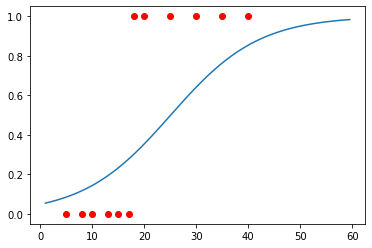

----
[0.25473227 0.41000569]


In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Volljährigkeit vorhersagen!
# Spalte 1: Alter
# Spalte 2: Volljährig: Ja / Nein?
points = np.array([
    [20, 1],
    [17, 0],
    [15, 0],
    [10, 0],
    [30, 1],
    [40, 1],
    [35, 1],
    [13, 0],
    [5, 0],
    [18, 1],
    [25, 1],
    [8, 0]
])


def S(x):
    return 1 / (1 + np.exp(-x))


def f(a, b, x):
    return S(a * x + b)


def J(a, b, x, y):
    return -np.mean(y * np.log(f(a, b, x)) + (1 - y) * np.log(1 - f(a, b, x)))


def J_ableitung_a(a, b, x, y):
    return np.mean(x * (S(a * x + b) - y))


def J_ableitung_b(a, b, x, y):
    return np.mean(S(a * x + b) - y)


lr = 0.05
a = 1
b = 1
for i in range(0, 500):
    da = J_ableitung_a(a, b, points[:, 0], points[:, 1])
    db = J_ableitung_b(a, b, points[:, 0], points[:, 1])
    a = a - lr * da
    b = b - lr * db

    cost = J(a, b, points[:, 0], points[:, 1])
    print("Kosten: " + str(cost))


xs = np.arange(1, 60, 0.5)
ys = f(a, b, xs)
plt.plot(xs, ys)

plt.scatter(points[:, 0], points[:, 1], c="r")
plt.show()

print("----")
print(f(a, b, np.array([16, 22])))

## Logistische Regression (mehrere Parameter)

In der Regel werden mehrere Parameter benötigt. Ein Bild mit 28×28 Pixeln, benötigt z.$~$B. 784 Eingänge, für jedes Pixel einen. Ein Beispiel soll den Vorgang verdeutlichen:

**Beispiel: AND-Ausdruck Lernen:**  

Es wird jetzt, mit dem [Neuron](neuron_activation) aus dem vorherigen Kapitel, ein "AND-Ausdruck" gelernt. Dieses Neuron besitzt zwei Eingänge und einen Bias-Term, an dem der Eingang immer 1 ist.

Die folgende Tabelle stellt alle 4 Varianten mit der gewünschten Antwort aus der Sigmoid-Funktion: 

|$X_{0}$|$X_{1}$|$X_{0}$ AND $X_{1}$|$S(X_{0} *w_{0}+X_{1}*w_{1}+b)$|
|:------|:------|:------------------:|:-----------------------------------:|
|0      |0      |0                  |$< 0.5$             |
|0      |1      |0                  |$< 0.5$             |
|1      |0      |0                  |$< 0.5$            |
|1      |1      |1                  |$> 0.5$             |

Die [Sigmoidfunktion](sigmoid) soll bei dem Zustand 0 ($X_{0}$ AND $X_{1}= 0 $) Werte ausgeben, die kleiner als 0.5 sind und bei dem Zustand 1 ($X_{0}$ AND $X_{1}= 1 $) Werte die größer sind als 0.5.

Die Gewichte (w) und der Bias (b) werden frei gewählt. Anschließend das Ergebnis in der Tabelle überprüft:  

$w_{0} = 10$  
$w_{1} = 10$  
$b = -15$

|$X_{0}$|$X_{1}$|$X_{0}$ AND $X_{1}$|$S(X_{0} *w_{0}+X_{1}*w_{1}+b)$|
|:------|:------|:------------------:|:-----------------------------------:|
|0      |0      |0                  |$S(0*10+0*10-15) = S(-15)$             |
|0      |1      |0                  |$S(0*10+1*10-15) = S(-5)$             |
|1      |0      |0                  |$S(1*10+0*10-15) = S(-5)$             |
|1      |1      |1                  |$S(1*10+1*10-15) = S(5)$             |

Die Sigmoidfunktion gibt für Werte größer als Null Werte aus die größer als 0.5 sind und bei Eingabewerten $< 0$ gibt die Sigmoid-Funktion Werte zurück die kleiner als 0.5 sind. 

In [20]:
# Sigmoidfunktionswert bei x = 5
x = 5
z = 1/(1 + np.exp(-x))
print(z)

0.9933071490757153


In [21]:
# Sigmoidfunktionswert bei x = -5
x = -5
z = 1/(1 + np.exp(-x))
print(z)

0.0066928509242848554


Mit diesen Gewichten und dem gewählten Bias-Wert würde das Modell die Funktion eines AND-Ausdrucks übernehmen können. Das folgende Programm trainiert ein logistisches Regressionsmodell und versucht den AND-Ausdruck somit zu erlernen. Die Gewichte und der Bias-Wert unterscheiden sich deutlich von den frei gewählten Parametern (siehe Output des folgenden Programms).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Beispiel aus Kurs von Jannis Seemann (Deep Learning Kurs)

X_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
])

y_train = np.array([
    0.0,
    0.0,
    0.0,
    1.0
])


def S(x):
    return 1 / (1 + np.exp(-x))


def f(w0, w1, b, x0, x1):
    return S(w0 * x0 + w1 * x1 + b)


def J(w0, w1, b, x0, x1, y):
    return -np.mean(y * np.log(f(w0, w1, b, x0, x1)) + \
                    (1 - y) * np.log(1 - f(w0, w1, b, x0, x1)))


def J_ableitung_w0(w0, w1, b, x0, x1, y):
    return np.mean(x0 * (f(w0, w1, b, x0, x1) - y))


def J_ableitung_w1(w0, w1, b, x0, x1, y):
    return np.mean(x1 * (f(w0, w1, b, x0, x1) - y))


def J_ableitung_b(w0, w1, b, x0, x1, y):
    return np.mean(f(w0, w1, b, x0, x1) - y)


lr = 0.1
w0 = 1
w1 = 1
b = 1
for i in range(0, 100):

    dw0 = J_ableitung_w0(w0, w1, b, X_train[:, 0], X_train[:, 1], y_train)
    dw1 = J_ableitung_w1(w0, w1, b, X_train[:, 0], X_train[:, 1], y_train)
    db = J_ableitung_b(w0, w1, b, X_train[:, 0], X_train[:, 1], y_train)

    w0 = w0 - lr * dw0
    w1 = w1 - lr * dw1
    b = b - lr * db

    cost = J(w0, w1, b, X_train[:, 0], X_train[:, 1], y_train)
    print("Kosten: " + str(cost))

print("Gewichte: ")
print("w0 = " + str(w0))
print("w1 = " + str(w1))
print("b = " + str(b))
print("Vorhersage für X0=1,X1=1: ")
print(f(w0, w1, b, 1.0, 1.0))
print("Vorhersage für X0=1,X1=0: ")
print(f(w0, w1, b, 1.0, 0.0))
print("Vorhersage für X0=0,X1=0: ")
print(f(w0, w1, b, 0.0, 0.0))

Kosten: 1.3582096467052187
Kosten: 1.3138428070565964
Kosten: 1.2708614099661517
Kosten: 1.2292968839670224
Kosten: 1.1891759331572511
Kosten: 1.1505200989640452
Kosten: 1.1133453875402337
Kosten: 1.0776619759898272
Kosten: 1.043474008544762
Kosten: 1.0107794910536225
Kosten: 0.9795702888246732
Kosten: 0.9498322291727783
Kosten: 0.92154530617514
Kosten: 0.8946839813863061
Kosten: 0.8692175708371741
Kosten: 0.8451107057579671
Kosten: 0.8223238522868354
Kosten: 0.8008138740584053
Kosten: 0.7805346210467576
Kosten: 0.7614375283346361
Kosten: 0.7434722095062399
Kosten: 0.7265870309811757
Kosten: 0.7107296556608356
Kosten: 0.6958475465745632
Kosten: 0.681888423626537
Kosten: 0.6688006689094551
Kosten: 0.6565336782496122
Kosten: 0.6450381585935687
Kosten: 0.6342663724854998
Kosten: 0.6241723321923868
Kosten: 0.6147119470124944
Kosten: 0.6058431279712472
Kosten: 0.5975258545013031
Kosten: 0.5897222078615776
Kosten: 0.582396376017557
Kosten: 0.5755146345262445
Kosten: 0.5690453076840086
Kosten

```{warning}
Die Vorhersage stimmt noch nicht, die Vorhersage sollte über 0.5 liegen, liegt aber nur bei 0.49. Das Model benötigt mehr Trainingsdurchläufe.

```

````{tip}
Erhöhe die Anzahl der Trainingsdurchläufe von 100 auf 1000
```
```python
for i in range(0, 1000):
```
````